In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all the rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

In [ ]:
df = pd.read_csv("/content/IPL_ball_by_ball_updated(2021).csv")

In [ ]:
df.shape

(208041, 22)

In [ ]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5])

In [ ]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [ ]:
df.innings.unique()

array([2, 1])

In [ ]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
req_df = df[(df.striker == 'AB de Villiers') & (df.bowler == 'JJ Bumrah')]

In [ ]:
req_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95691,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
req_df.shape

(86, 22)

In [ ]:
#No of runs scored?
#No of wickets?
#No of balls faced

In [ ]:
sum(req_df['runs_off_bat'])

125

In [ ]:
#balls faced
req_df.shape

(86, 22)

In [ ]:
#bumrah got the wickets
len(req_df[req_df['player_dismissed'] == 'AB de Villiers'])

3

In [ ]:
#SR
100*sum(req_df['runs_off_bat'])/86


145.34883720930233

COMPARISIONS AGAINST ALL BATSMAN BUMRAH BOWLED FROM 2008-2021


In [ ]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#bdf = df[(df['bowler'] == 'JJ Bumrah') & (df['striker'] != 'AB de Villiers')]
bdf = df[(df['bowler'] == 'JJ Bumrah')]

In [ ]:
bdf.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76627,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KB Arun Karthik,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bdf1 = pd.DataFrame(bdf.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [ ]:
bdf2 = pd.DataFrame(bdf.groupby('striker')['ball'].count()).reset_index()

In [ ]:
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,86
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,29


In [ ]:
bdf3 = bdf1.merge(bdf2, on = 'striker',how = 'left')

In [ ]:
bdf3['StrikeRate'] = 100*bdf3['runs_off_bat']/bdf3['ball']

In [ ]:
bdf3.head(1)

,striker,runs_off_bat,ball,StrikeRate
0,A Mishra,1,5,20.0


In [ ]:
bdf3 = bdf3[bdf3['ball'] >= 30]

In [ ]:
bdf3.head()

,striker,runs_off_bat,ball,StrikeRate
1,AB de Villiers,125,86,145.348837
3,AD Russell,51,41,124.390244
8,AM Rahane,43,35,122.857143
9,AR Patel,21,32,65.625000
12,AT Rayudu,48,34,141.176471


ABD GAME START HERE

In [ ]:
adf = df[df['striker'] == 'AB de Villiers']

In [ ]:
adf.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
4575,336001,2008,2008-05-02,"MA Chidambaram Stadium, Chepauk",2,14.6,Delhi Daredevils,Chennai Super Kings,AB de Villiers,S Dhawan,MS Gony,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
adf1 = pd.DataFrame(adf.groupby('bowler')['runs_off_bat'].sum().reset_index())

In [ ]:
adf2  = pd.DataFrame(adf.groupby('bowler')['ball'].count().reset_index())

In [ ]:
adf3 = adf1.merge(adf2,on = 'bowler',how = 'left')

In [ ]:
adf3.head(3)

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18
1,A Chandila,26,11
2,A Flintoff,34,12


In [ ]:
adf3['strikerate'] = 100*adf3['runs_off_bat']/adf3['ball']

In [ ]:
adf3.head(3)

,bowler,runs_off_bat,ball,strikerate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333


In [ ]:
adf3 = adf3[adf3['ball'] >= 30]

In [ ]:
adf3.head()

,bowler,runs_off_bat,ball,strikerate
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108
16,AD Russell,87,39,223.076923
20,AR Patel,71,70,101.428571
32,B Kumar,68,43,158.139535


In [ ]:
bdf3.sort_values('StrikeRate',ascending = False)

,striker,runs_off_bat,ball,StrikeRate
68,JP Duminy,70,33,212.121212
92,MK Pandey,61,33,184.848485
49,F du Plessis,58,34,170.588235
76,KD Karthik,54,33,163.636364
158,V Kohli,126,85,148.235294
143,SS Iyer,59,40,147.500000
1,AB de Villiers,125,86,145.348837
126,RV Uthappa,52,36,144.444444
12,AT Rayudu,48,34,141.176471
135,SK Raina,50,39,128.205128


In [ ]:
adf3.sort_values('strikerate',ascending = False)

,bowler,runs_off_bat,ball,strikerate
62,HH Pandya,88,39,225.641026
16,AD Russell,87,39,223.076923
86,JP Faulkner,62,30,206.666667
40,CH Morris,71,35,202.857143
127,Mohammed Shami,59,30,196.666667
181,SL Malinga,124,64,193.750000
193,Sandeep Sharma,107,57,187.719298
175,SB Jakati,55,30,183.333333
108,M Ashwin,55,31,177.419355
142,PV Tambe,54,32,168.750000


**VISUALIZATION**

In [ ]:
# plt.figure(figsize = (16,8))
# plt.scatter(bdf3['StrikeRate'],bdf3['runs_off_bat'])

# for i in range(0,28):
#   plt.text(bdf3['StrikeRate'][i], bdf3['runs_off_bat'][i], bdf3['striker'][i] )

# plt.title("BATSMAN AGAINST BUMRAH IN IPL(DEBUT-2021)-MINIMUM 30 BALLS")
# plt.xlabel("StrikeRate")
# plt.ylabel("Runs")
# plt.show()

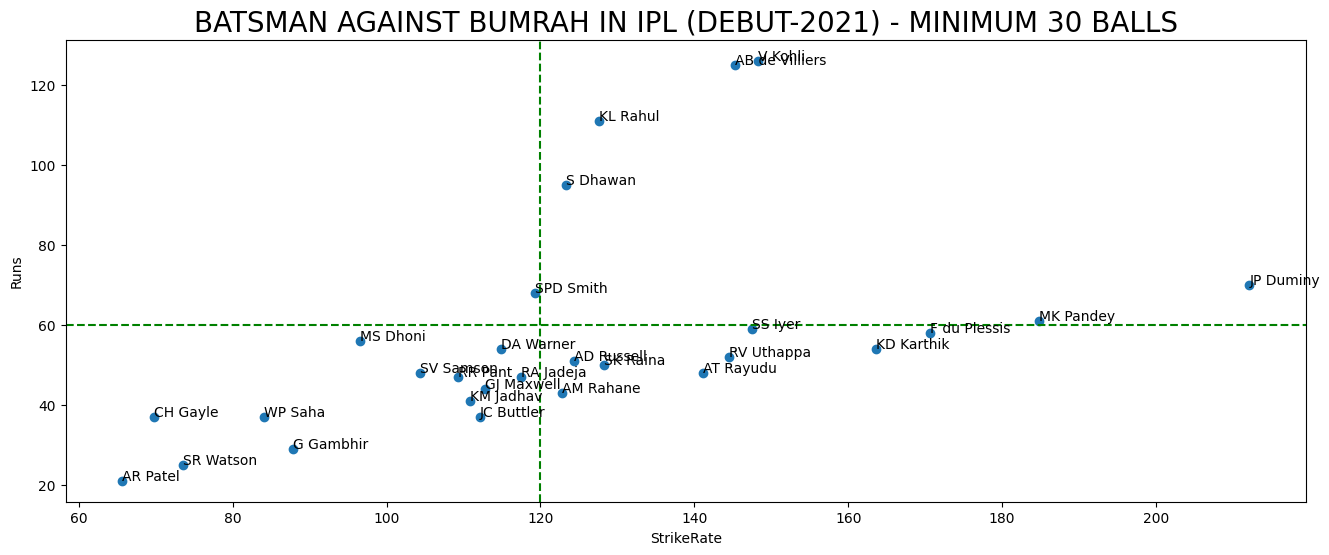

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.scatter(bdf3['StrikeRate'], bdf3['runs_off_bat'])

for index, row in bdf3.iterrows():
    plt.text(row['StrikeRate'], row['runs_off_bat'], row['striker'])

plt.title("BATSMAN AGAINST BUMRAH IN IPL (DEBUT-2021) - MINIMUM 30 BALLS",fontsize=20)
plt.xlabel("StrikeRate")
plt.ylabel("Runs")
plt.axvline(120, ls = '--',color = 'green')
plt.axhline(60, ls = '--',color = 'green')
plt.show()


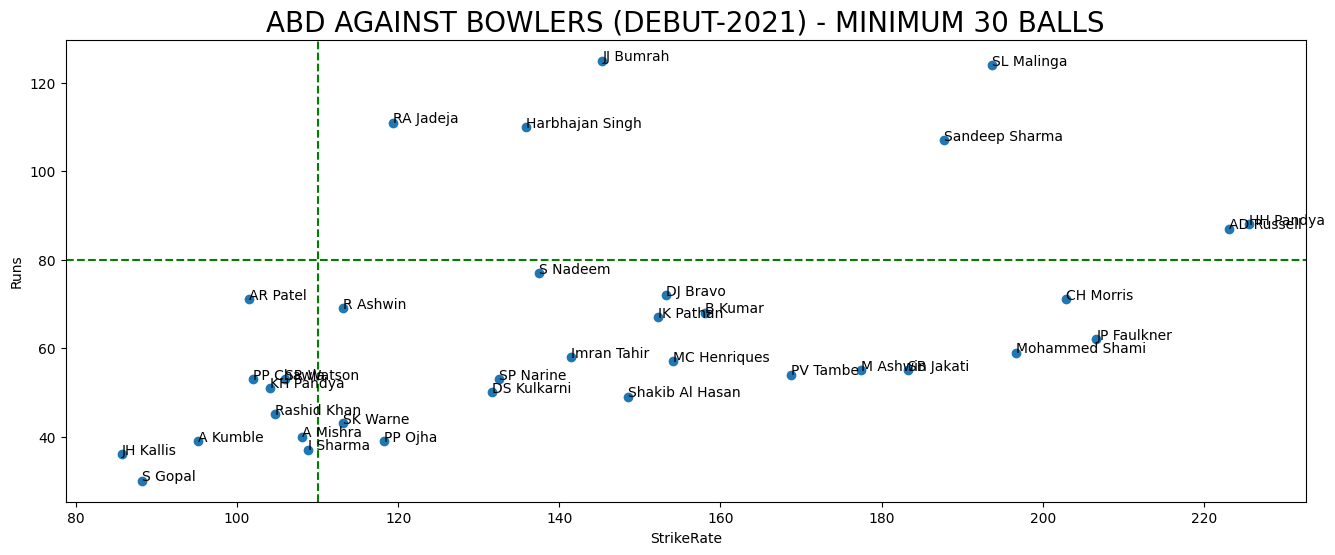

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.scatter(adf3['strikerate'], adf3['runs_off_bat'])

for index, row in adf3.iterrows():
    plt.text(row['strikerate'], row['runs_off_bat'], row['bowler'])

plt.title("ABD AGAINST BOWLERS (DEBUT-2021) - MINIMUM 30 BALLS",fontsize=20)
plt.xlabel("StrikeRate")
plt.ylabel("Runs")
plt.axvline(110, ls = '--',color = 'green')
plt.axhline(80, ls = '--',color = 'green')

plt.show()

**CONCLUSION**

In [ ]:
  #ABD V/s BOOM BOOM
  # Runs scored = 125
  # Balls Faced = 86
  # SR = 145
  # out = 3